# Worksheet 1

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def create_data(N):
    Y = np.random.randint(0, 2, size=N)  # Sample instance labels from prior 1/2
    if N == 2:
        while np.all(Y == Y[0]):
            Y = np.random.randint(0, 2, size=N)  # Sample instance labels from prior 1/2

    u = np.random.uniform(size=N)
    X = np.zeros(N)

    for i in range(N):
        if Y[i] == 0:
            X[i] = 1 - np.sqrt(1 - u[i])
        else:
            X[i] = np.array(np.sqrt(u[i]))

    data_set = np.stack((X, Y), axis=1)
    return data_set


def plot_data(data):
    fig, ax = plt.subplots(1, 2, figsize=(20,20))
    ax[0].scatter(data[:, 1], data[:, 0], alpha=0.3, color='black')
    ax[0].set_title("Scatter of the data")
    ax[0].set_xlabel("Classes")
    ax[0].set_xlim(-0.5, 1.5)
    ax[0].set_ylabel("Data points")
    ax[0].set_ylim(-0.5, 1.5)
    ax[1].hist2d(data[:, 1], data[:, 0], bins=(2, 20))
    ax[1].set_title("Histogram of data per class")
    plt.show()

## Task 1

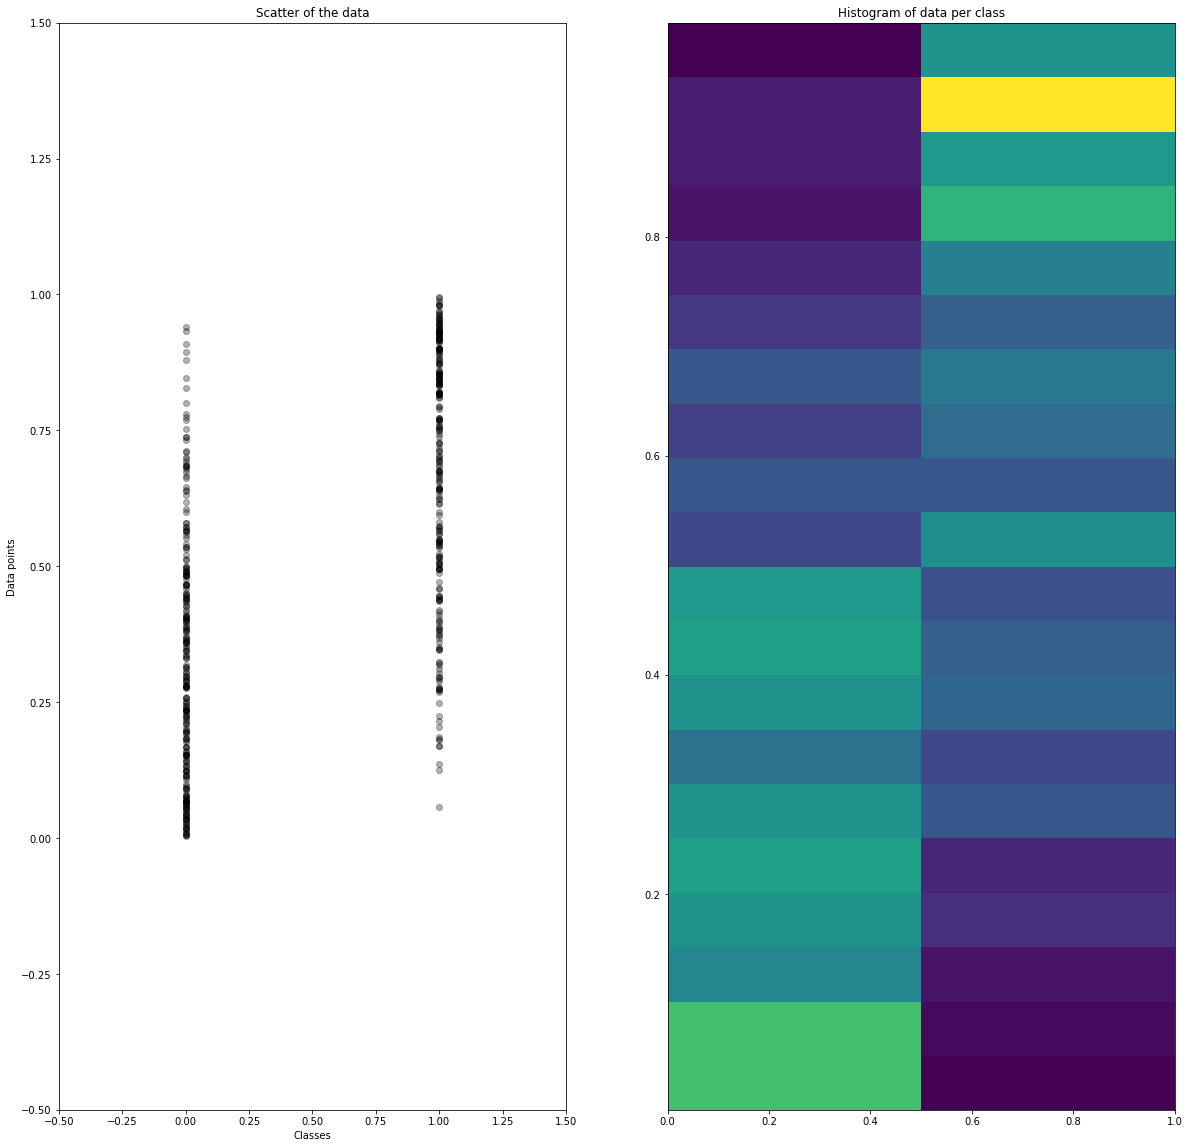

In [5]:
data = create_data(500)
plot_data(data)

In [10]:
r = 45
def threshold_classifier(x, type, threshold=None, error=False):
    if type == 'A':
        if error is True:
            return 1 / 4 + (threshold - 1 / 2) ** 2
        else:
            binary_arr = np.where(x < threshold, 0, 1)
            return binary_arr
    if type == 'B':
        if error is True:
            return 3 / 4 - (threshold - 1 / 2) ** 2
        else:
            binary_arr = np.where(x < threshold, 1, 0)
            return binary_arr
    if type == 'C':
        if error is True:
            return 1 / 2
        else:
            return np.random.randint(0, 2, len(x))
    if type == 'D':
        if error is True:
            return 1 / 2
        else:
            return np.ones(len(x))


def thresholding_error(N, threshold=None, plot=False, dataset=None):
    if threshold is not None:
        thr_dict = {}
        batch_dict = {}
        mean_error = {}
        std_error = {}
        for i in range(len(threshold)):
            thr_dict['Threshold: ' + str(threshold[i])] = np.zeros(shape=(4, len(N)))
        for i in range(len(N)):
            batch_dict['Batch: ' + str(N[i])] = np.zeros(shape=(4, len(threshold)))
            mean_error['Mean error for batch size {}: '.format(N[i])] = np.zeros(4)
            std_error['Std. error for batch size {}: '.format(N[i])] = np.zeros(4)
        for j in range(len(threshold)):
            for i in range(10):
                for k in range(len(N)):
                    data = create_data(N[k])

                    # Analytical error
                    a_error_A = threshold_classifier(data[:, 0], type='A', threshold=threshold[j], error=True)
                    a_error_B = threshold_classifier(data[:, 0], type='B', threshold=threshold[j], error=True)

                    # Numerical error
                    prediction_A = threshold_classifier(data[:, 0], type='A', threshold=threshold[j])
                    prediction_B = threshold_classifier(data[:, 0], type='B', threshold=threshold[j])

                    n_error_A = np.sum(np.abs(np.subtract(prediction_A, data[:, 1])))
                    n_error_B = np.sum(np.abs(np.subtract(prediction_B, data[:, 1])))

                    num_error_A = n_error_A / (N[k])
                    num_error_B = n_error_B / (N[k])

                    print("Threshold: {}, dataset: {}, batch_size: {}".format(threshold[j], i, N[k]))
                    print("Analytical error classifier A: {}".format(a_error_A))
                    print("Numerical error classifier A: {}".format(num_error_A))
                    print("Analytical error classifier B: {}".format(a_error_B))
                    print("Numerical error classifier B: {} \n".format(num_error_B))

                    if plot is True:
                        if dataset == i:
                            thr_dict['Threshold: ' + str(threshold[j])][0, k] = a_error_A
                            thr_dict['Threshold: ' + str(threshold[j])][1, k] = num_error_A
                            thr_dict['Threshold: ' + str(threshold[j])][2, k] = a_error_B
                            thr_dict['Threshold: ' + str(threshold[j])][3, k] = num_error_B

                            batch_dict['Batch: ' + str(N[k])][0, j] = a_error_A
                            batch_dict['Batch: ' + str(N[k])][1, j] = num_error_A
                            batch_dict['Batch: ' + str(N[k])][2, j] = a_error_B
                            batch_dict['Batch: ' + str(N[k])][3, j] = num_error_B

        # Calculate mean and standard deviation pro batch size
        for k in range(len(N)):
            for j in range(len(threshold)):
                mean_error['Mean error for batch size {}: '.format(N[k])] = np.mean(
                    batch_dict['Batch: ' + str(N[k])][0, :])
                mean_error['Mean error for batch size {}: '.format(N[k])] = np.mean(
                    batch_dict['Batch: ' + str(N[k])][1, :])
                mean_error['Mean error for batch size {}: '.format(N[k])] = np.mean(
                    batch_dict['Batch: ' + str(N[k])][2, :])
                mean_error['Mean error for batch size {}: '.format(N[k])] = np.mean(
                    batch_dict['Batch: ' + str(N[k])][3, :])

                std_error['Std. error for batch size {}: '.format(N[k])][0] = np.std(
                    batch_dict['Batch: ' + str(N[k])][0, :])
                std_error['Std. error for batch size {}: '.format(N[k])][1] = np.std(
                    batch_dict['Batch: ' + str(N[k])][1, :])
                std_error['Std. error for batch size {}: '.format(N[k])][2] = np.std(
                    batch_dict['Batch: ' + str(N[k])][2, :])
                std_error['Std. error for batch size {}: '.format(N[k])][3] = np.std(
                    batch_dict['Batch: ' + str(N[k])][3, :])

        print(
            "Data set: {}, Threshold: {}, Batch size: {}, Classifier: A. Standard deviation analytical error: {}".format(
                dataset, j, N[k], std_error['Std. error for batch size {}: '.format(N[k])][0]))
        print(
            "Data set: {}, Threshold: {}, Batch size: {}, Classifier: A. Standard deviation numerical error: {}".format(
                dataset, j, N[k], std_error['Std. error for batch size {}: '.format(N[k])][1]))
        print(
            "Data set: {}, Threshold: {}, Batch size: {}, Classifier: B. Standard deviation analytical error: {}".format(
                dataset, j, N[k], std_error['Std. error for batch size {}: '.format(N[k])][2]))
        print(
            "Data set: {}, Threshold: {}, Batch size: {}, Classifier: B. Standard deviation numerical error: {} \n".format(
                dataset, j, N[k], std_error['Std. error for batch size {}: '.format(N[k])][3]))

        plot_thresholding_error(thr_dict, N, threshold, std_error)

    else:
        error = np.zeros(shape=(4, len(N)))
        mean_error = np.zeros(shape=(4, len(N)))
        std_error = np.zeros(shape=(4, len(N)))
        for i in range(10):
            for k in range(len(N)):
                data = create_data(N[k])

                # Analytical error
                a_error_C = threshold_classifier(data[:, 0], type='C', error=True)
                a_error_D = threshold_classifier(data[:, 0], type='D', error=True)
                # Numerical error
                prediction_C = threshold_classifier(data[:, 0], type='C')
                prediction_D = threshold_classifier(data[:, 0], type='D')

                n_error_C = np.sum(np.abs(np.subtract(prediction_C, data[:, 1])))
                n_error_D = np.sum(np.abs(np.subtract(prediction_D, data[:, 1])))

                num_error_C = n_error_C / (N[k])
                num_error_D = n_error_D / (N[k])

                print("Dataset: {}, batch_size: {}".format(i, N[k]))
                print("Analytical error classifier C: {}".format(a_error_C))
                print("Numerical error classifier C: {}".format(num_error_C))
                print("Analytical error classifier D: {}".format(a_error_D))
                print("Numerical error classifier D: {} \n".format(num_error_D))

                if plot is True:
                    if dataset == i:
                        error[0, k] = a_error_C
                        error[1, k] = num_error_C
                        error[2, k] = a_error_D
                        error[3, k] = num_error_D

        # Calculate mean and standard deviation pro batch size
        for k in range(len(N)):
            mean_error[0, k] = np.mean(error[0, :])
            mean_error[1, k] = np.mean(error[1, :])
            mean_error[2, k] = np.mean(error[2, :])
            mean_error[3, k] = np.mean(error[3, :])

            std_error[0, k] = np.std(error[0, :])
            std_error[1, k] = np.std(error[1, :])
            std_error[2, k] = np.std(error[2, :])
            std_error[3, k] = np.std(error[3, :])

        print(
            "Data set: {}, Batch size: {}, Classifier: A. Standard deviation analytical error: {}".format(
                dataset, N[k], std_error[0, k]))
        print(
            "Data set: {}, Batch size: {}, Classifier: A. Standard deviation numerical error: {}".format(
                dataset, N[k], std_error[1, k]))
        print(
            "Data set: {}, Batch size: {}, Classifier: B. Standard deviation analytical error: {}".format(
                dataset, N[k], std_error[2, k]))
        print(
            "Data set: {}, Batch size: {}, Classifier: B. Standard deviation numerical error: {} \n".format(
                dataset, N[k], std_error[3, k]))

        plot_thresholding_error(error, N, std=std_error)


def plot_thresholding_error(error, batch_size, threshold=None, std=None):
    if threshold is not None:
        if std is None:
            fig, ax = plt.subplots(1, len(threshold), figsize=(20,20))
            errors = ['Analytical error classifier A', 'Numerical error classifier A', 'Analytical error classifier B',
                      'Numerical error classifier B']
            for i in range(len(threshold)):
                # Dictionary to array
                a_error_A = error['Threshold: ' + str(threshold[i])][0, :]
                num_error_A = error['Threshold: ' + str(threshold[i])][1, :]
                a_error_B = error['Threshold: ' + str(threshold[i])][2, :]
                num_error_B = error['Threshold: ' + str(threshold[i])][3, :]

                ax[i].plot(batch_size, a_error_A, batch_size, num_error_A, batch_size, a_error_B, batch_size,
                           num_error_B)
                ax[i].set_title("Threshold {}".format(threshold[i]), fontsize=8.5)
                ax[i].legend(errors, fontsize='xx-small')
                ax[i].tick_params(axis='both', labelsize=5)
                ax[i].set_xlabel("Batch size", fontsize=7)
                ax[i].set_xlim(-1000, batch_size[-1] + 1000)
                ax[i].set_xticks(batch_size[1:len(batch_size)])
                ax[i].set_ylabel("Error", fontsize=7)
                ax[i].set_ylim(0, 1)
                ax[i].set_yticks(np.linspace(0, 1, 5))
                plt.setp(ax[i].get_xticklabels(), rotation=r, horizontalalignment='right')
        else:
            fig, ax = plt.subplots(1, len(threshold) + 2, figsize=(20,20))
            errors = ['A.E C-A', 'N.E C-A', 'A.E C-B',
                      'N.E C-B']

            stds_A = []
            stds_B = []
            for i in range(len(threshold)):
                stds_A.append('Std. A.E. C-A, T. {}'.format(threshold[i]))
                stds_A.append('Std. N.E. C-A, T. {}'.format(threshold[i]))
                stds_B.append('Std. A.E. C-B, T. {}'.format(threshold[i]))
                stds_B.append('Std. N.E. C-B, T. {}'.format(threshold[i]))

            for i in range(len(threshold)):
                # Dictionary to array
                a_error_A = error['Threshold: ' + str(threshold[i])][0, :]
                num_error_A = error['Threshold: ' + str(threshold[i])][1, :]
                a_error_B = error['Threshold: ' + str(threshold[i])][2, :]
                num_error_B = error['Threshold: ' + str(threshold[i])][3, :]

                ax[i].plot(batch_size, a_error_A, '-', lw=1)
                ax[i].plot(batch_size, num_error_A, '-', lw=1)
                ax[i].plot(batch_size, a_error_B, '-', lw=1)
                ax[i].plot(batch_size, num_error_B, '-', lw=1)
                ax[i].set_title("Threshold {}".format(threshold[i]), fontsize=8.5)
                ax[i].legend(errors, fontsize='xx-small', loc='upper right')
                ax[i].tick_params(axis='both', labelsize=5)
                ax[i].set_xlabel("Batch size", fontsize=7)
                ax[i].set_xlim(-1000, batch_size[-1] + 1000)
                ax[i].set_xticks(batch_size[1:len(batch_size)])
                ax[i].set_ylabel("Error", fontsize=7)
                ax[i].set_ylim(0, 1)
                ax[i].set_yticks(np.linspace(0, 1, 5))
                plt.setp(ax[i].get_xticklabels(), rotation=r, horizontalalignment='right')

                for k in range(len(batch_size)):
                    # Dictionary to array
                    std_a_error_A = std['Std. error for batch size {}: '.format(batch_size[k])][0]
                    std_num_error_A = std['Std. error for batch size {}: '.format(batch_size[k])][1]
                    std_a_error_B = std['Std. error for batch size {}: '.format(batch_size[k])][2]
                    std_num_error_B = std['Std. error for batch size {}: '.format(batch_size[k])][3]

                    batch_arr = std['Std. error for batch size {}: '.format(batch_size[k])][:]

                    ax[len(threshold)].errorbar(batch_size.tolist(), a_error_A, yerr=std_a_error_A, fmt='.',
                                                markersize=5, alpha=0.7)
                    ax[len(threshold)].errorbar(batch_size.tolist(), num_error_A, yerr=std_num_error_A, fmt='.',
                                                markersize=5, alpha=0.7)
                    ax[len(threshold)].legend(stds_A, fontsize='xx-small', loc='upper right')
                    ax[len(threshold)].tick_params(axis='both', labelsize=5)
                    ax[len(threshold)].set_xlabel("Batch size", fontsize=7)
                    ax[len(threshold)].set_xlim(-1000, batch_size[-1] + 1000)
                    ax[len(threshold)].set_xticks(batch_size[1:len(batch_size)])
                    ax[len(threshold)].set_ylabel("Standard deviation", fontsize=7)
                    ax[len(threshold)].set_yticks(np.linspace(0, 0.5, 5))
                    ax[len(threshold)].set_ylim(0, 0.5)
                    plt.setp(ax[len(threshold)].get_xticklabels(), rotation=r, horizontalalignment='right')

                    ax[len(threshold) + 1].errorbar(batch_size.tolist(), a_error_B, yerr=std_a_error_B, fmt='.',
                                                    markersize=5, alpha=0.7)
                    ax[len(threshold) + 1].errorbar(batch_size.tolist(), num_error_B, yerr=std_num_error_B, fmt='.',
                                                    markersize=5, alpha=0.7)
                    ax[len(threshold) + 1].legend(stds_B, fontsize='xx-small', loc='upper right')
                    ax[len(threshold) + 1].tick_params(axis='both', labelsize=5)
                    ax[len(threshold) + 1].set_xlabel("Batch size", fontsize=7)
                    ax[len(threshold) + 1].set_xlim(-1000, batch_size[-1] + 1000)
                    ax[len(threshold) + 1].set_xticks(batch_size[1:len(batch_size)])
                    ax[len(threshold) + 1].set_ylabel("Standard deviation", fontsize=7)
                    ax[len(threshold) + 1].set_yticks(np.linspace(0.5, 1, 5))
                    ax[len(threshold) + 1].set_ylim(0.5, 1)
                    plt.setp(ax[len(threshold) + 1].get_xticklabels(), rotation=r, horizontalalignment='right')

    else:
        a_error_C = error[0, :]
        num_error_C = error[1, :]
        a_error_D = error[2, :]
        num_error_D = error[3, :]

        stds_C = ('Std. A.E. C-C', 'Std. N.E. C-C')
        stds_D = ('Std. B.E. C-D', 'Std. N.E. C-D')

        fig, ax = plt.subplots(1, 3, figsize=(20,20))
        ax[0].plot(batch_size, a_error_C, lw=1)
        ax[0].plot(batch_size, num_error_C, lw=1)
        ax[0].plot(batch_size, a_error_D, lw=1)
        ax[0].plot(batch_size, num_error_D, lw=1)
        ax[0].set_ylabel("Error", fontsize=7)
        ax[0].set_xlim(-1000, batch_size[-1] + 1000)
        ax[0].set_ylim(0, 1)
        plt.setp(ax[0].get_xticklabels(), rotation=r, horizontalalignment='right')

        for k in range(len(batch_size)):
            std_a_error_C = std[0, k]
            std_num_error_C = std[1, k]
            std_a_error_D = std[2, k]
            std_num_error_D = std[3, k]

            ax[1].errorbar(batch_size.tolist(), a_error_C, yerr=std_a_error_C, fmt='.', markersize=5, alpha=0.7)
            ax[1].errorbar(batch_size.tolist(), num_error_C, yerr=std_num_error_C, fmt='.', markersize=5, alpha=0.7)
            ax[1].legend(stds_C, fontsize='xx-small', loc='upper right')
            ax[1].tick_params(axis='both', labelsize=5)
            ax[1].set_xlabel("Batch size", fontsize=7)
            ax[1].set_xlim(-1000, batch_size[-1] + 1000)
            ax[1].set_xticks(batch_size[1:len(batch_size)])
            ax[1].set_ylabel("Standard deviation", fontsize=7)
            ax[1].set_yticks(np.linspace(0.3, 0.7, 5))
            ax[1].set_ylim(0.3, 0.7)
            plt.setp(ax[1].get_xticklabels(), rotation=r, horizontalalignment='right')

            ax[2].errorbar(batch_size.tolist(), a_error_D, yerr=std_a_error_D, fmt='.', markersize=5, alpha=0.7)
            ax[2].errorbar(batch_size.tolist(), num_error_D, yerr=std_num_error_D, fmt='.', markersize=5, alpha=0.7)
            ax[2].legend(stds_D, fontsize='xx-small', loc='upper right')
            ax[2].tick_params(axis='both', labelsize=5)
            ax[2].set_xlabel("Batch size", fontsize=7)
            ax[2].set_xlim(-1000, batch_size[-1] + 1000)
            ax[2].set_xticks(batch_size[1:len(batch_size)])
            ax[2].set_ylabel("Standard deviation", fontsize=7)
            ax[2].set_yticks(np.linspace(0.3, 0.7, 5))
            ax[2].set_ylim(0.3, 0.7)
            plt.setp(ax[2].get_xticklabels(), rotation=r, horizontalalignment='right')

    plt.subplots_adjust(wspace=0.5)
    plt.show()

## Task 2

Threshold: 0.2, dataset: 0, batch_size: 10
Analytical error classifier A: 0.33999999999999997
Numerical error classifier A: 0.3
Analytical error classifier B: 0.66
Numerical error classifier B: 0.7 

Threshold: 0.2, dataset: 0, batch_size: 100
Analytical error classifier A: 0.33999999999999997
Numerical error classifier A: 0.37
Analytical error classifier B: 0.66
Numerical error classifier B: 0.63 

Threshold: 0.2, dataset: 0, batch_size: 1000
Analytical error classifier A: 0.33999999999999997
Numerical error classifier A: 0.337
Analytical error classifier B: 0.66
Numerical error classifier B: 0.663 

Threshold: 0.2, dataset: 0, batch_size: 10000
Analytical error classifier A: 0.33999999999999997
Numerical error classifier A: 0.3404
Analytical error classifier B: 0.66
Numerical error classifier B: 0.6596 

Threshold: 0.2, dataset: 1, batch_size: 10
Analytical error classifier A: 0.33999999999999997
Numerical error classifier A: 0.3
Analytical error classifier B: 0.66
Numerical error cl

Threshold: 0.5, dataset: 4, batch_size: 10000
Analytical error classifier A: 0.25
Numerical error classifier A: 0.2492
Analytical error classifier B: 0.75
Numerical error classifier B: 0.7508 

Threshold: 0.5, dataset: 5, batch_size: 10
Analytical error classifier A: 0.25
Numerical error classifier A: 0.3
Analytical error classifier B: 0.75
Numerical error classifier B: 0.7 

Threshold: 0.5, dataset: 5, batch_size: 100
Analytical error classifier A: 0.25
Numerical error classifier A: 0.22
Analytical error classifier B: 0.75
Numerical error classifier B: 0.78 

Threshold: 0.5, dataset: 5, batch_size: 1000
Analytical error classifier A: 0.25
Numerical error classifier A: 0.249
Analytical error classifier B: 0.75
Numerical error classifier B: 0.751 

Threshold: 0.5, dataset: 5, batch_size: 10000
Analytical error classifier A: 0.25
Numerical error classifier A: 0.2495
Analytical error classifier B: 0.75
Numerical error classifier B: 0.7505 

Threshold: 0.5, dataset: 6, batch_size: 10
Analy

Threshold: 0.6, dataset: 8, batch_size: 10000
Analytical error classifier A: 0.26
Numerical error classifier A: 0.2661
Analytical error classifier B: 0.74
Numerical error classifier B: 0.7339 

Threshold: 0.6, dataset: 9, batch_size: 10
Analytical error classifier A: 0.26
Numerical error classifier A: 0.5
Analytical error classifier B: 0.74
Numerical error classifier B: 0.5 

Threshold: 0.6, dataset: 9, batch_size: 100
Analytical error classifier A: 0.26
Numerical error classifier A: 0.3
Analytical error classifier B: 0.74
Numerical error classifier B: 0.7 

Threshold: 0.6, dataset: 9, batch_size: 1000
Analytical error classifier A: 0.26
Numerical error classifier A: 0.265
Analytical error classifier B: 0.74
Numerical error classifier B: 0.735 

Threshold: 0.6, dataset: 9, batch_size: 10000
Analytical error classifier A: 0.26
Numerical error classifier A: 0.2655
Analytical error classifier B: 0.74
Numerical error classifier B: 0.7345 

Data set: 1, Threshold: 2, Batch size: 10000, Clas

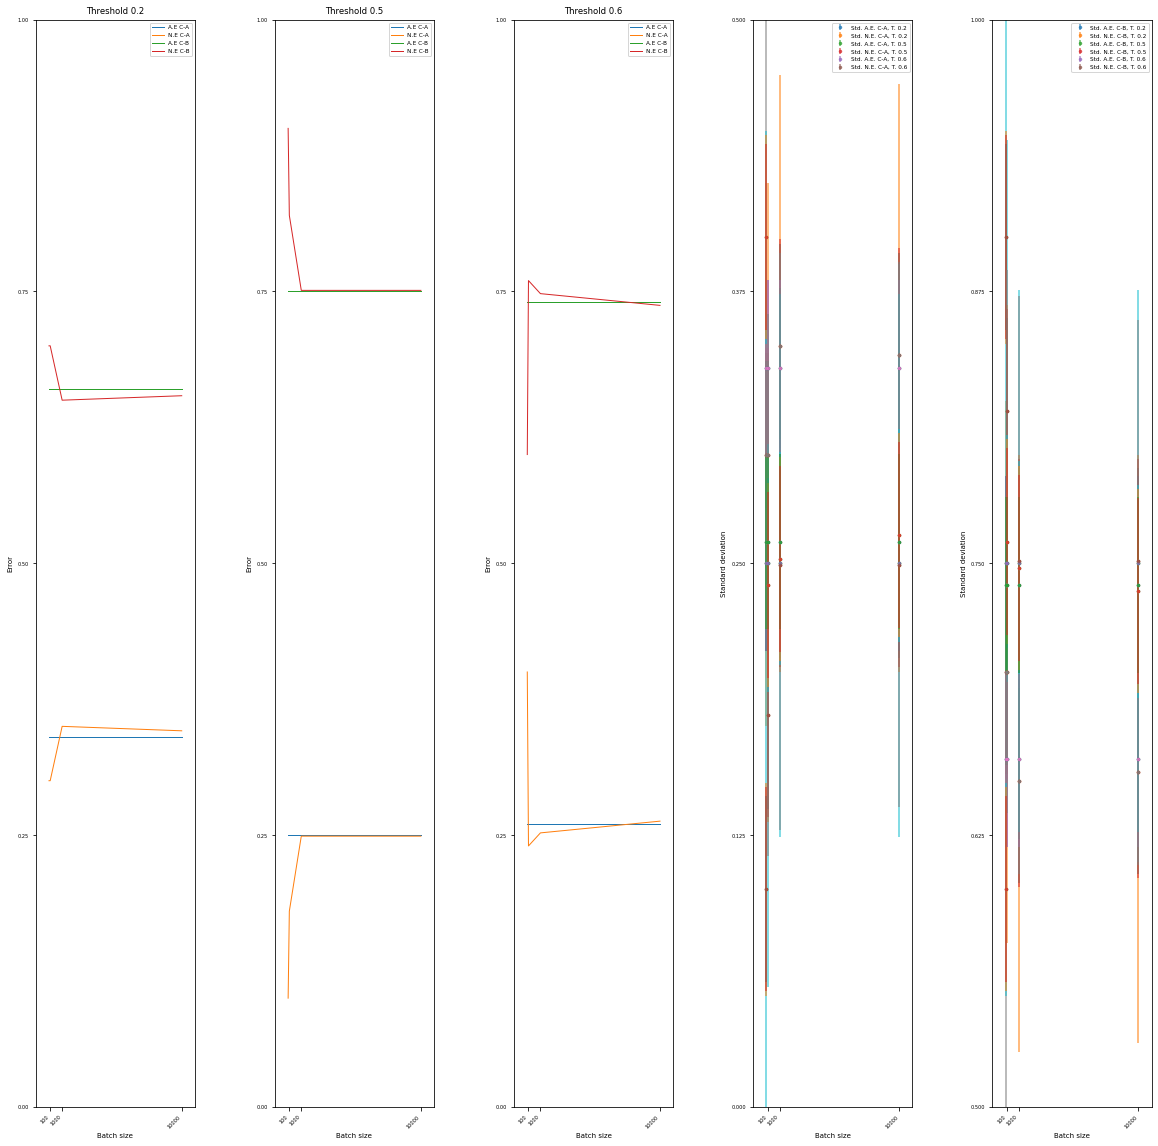

In [11]:
threshold = np.array([0.2, 0.5, 0.6])
batch_size = np.array([10, 100, 1000, 10000])
thresholding_error(batch_size, threshold, plot=True, dataset=1)

## Task 3

Dataset: 0, batch_size: 10
Analytical error classifier C: 0.5
Numerical error classifier C: 0.6
Analytical error classifier D: 0.5
Numerical error classifier D: 0.4 

Dataset: 0, batch_size: 100
Analytical error classifier C: 0.5
Numerical error classifier C: 0.57
Analytical error classifier D: 0.5
Numerical error classifier D: 0.49 

Dataset: 0, batch_size: 1000
Analytical error classifier C: 0.5
Numerical error classifier C: 0.502
Analytical error classifier D: 0.5
Numerical error classifier D: 0.512 

Dataset: 0, batch_size: 10000
Analytical error classifier C: 0.5
Numerical error classifier C: 0.5062
Analytical error classifier D: 0.5
Numerical error classifier D: 0.5053 

Dataset: 1, batch_size: 10
Analytical error classifier C: 0.5
Numerical error classifier C: 0.5
Analytical error classifier D: 0.5
Numerical error classifier D: 0.5 

Dataset: 1, batch_size: 100
Analytical error classifier C: 0.5
Numerical error classifier C: 0.46
Analytical error classifier D: 0.5
Numerical erro

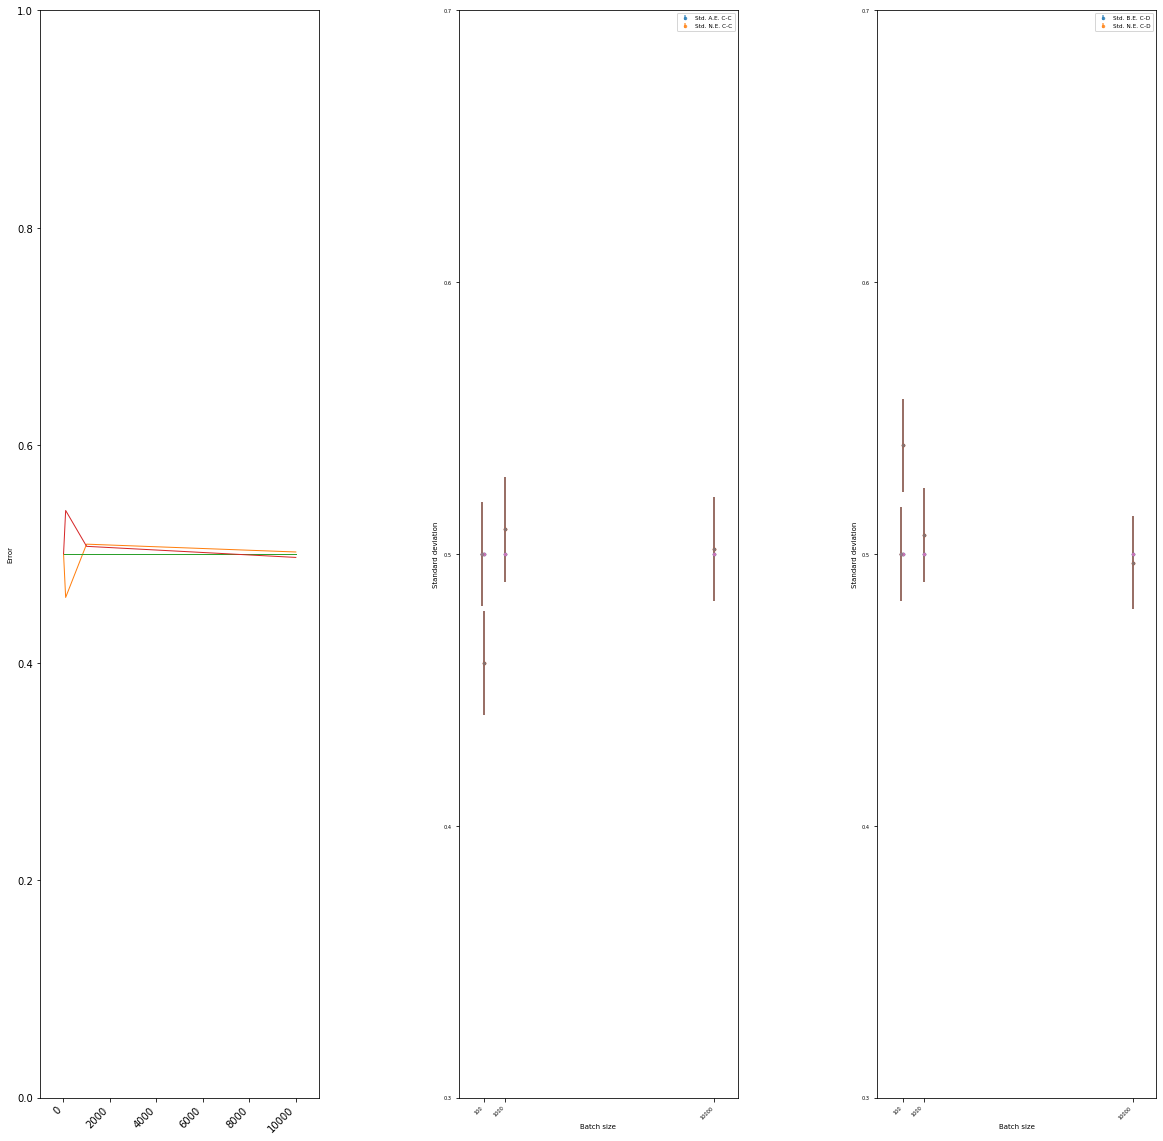

In [12]:
batch_size = np.array([10, 100, 1000, 10000])
thresholding_error(batch_size, plot=True, dataset=1)

In [13]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum(np.subtract(x1, x2) ** 2))


def manhattan_distance(x1, x2):
    return np.sum(np.abs(np.subtract(x1, x2)))


def weighted_euclidean_distance():
    pass

In [20]:
def nn_predict(represent, test_set, metric):
    if metric == 'euclidean':
        prediction = np.zeros(test_set.shape[0])
        for i in range(test_set.shape[0]):
            if euclidean_distance(represent[0, 0], test_set[i, 0]) < euclidean_distance(represent[1, 0], test_set[i, 0]):
                prediction[i] = represent[0, 1]
            if euclidean_distance(represent[0, 0], test_set[i, 0]) > euclidean_distance(represent[1, 0], test_set[i, 0]):
                prediction[i] = represent[1, 1]
            else:
                prediction[i] = np.random.randint(0, 2, 1)
    if metric == 'manhattan':
        prediction = np.zeros(test_set.shape[0])
        for i in range(test_set.shape[0]):
            if manhattan_distance(represent[0, 0], test_set[i, 0]) < euclidean_distance(represent[1, 0], test_set[i, 0]):
                prediction[i] = represent[0, 1]
            if manhattan_distance(represent[0, 0], test_set[i, 0]) > euclidean_distance(represent[1, 0], test_set[i, 0]):
                prediction[i] = represent[1, 1]
            else:
                prediction[i] = np.random.randint(0, 2, 1)

    if metric == 'weighted euclidean':
        pass

    return prediction


def nearest_neighbor(represent, test_set, metric):
    batch_size = len(test_set)
    prediction = nn_predict(represent, test_set, metric)

    n_error = np.sum(np.abs(np.subtract(prediction, test_set[:, 1])))
    num_error = n_error / batch_size
    # print("Numerical error: {}".format(num_error))
    return num_error

In [21]:
test_set = create_data(1000)
num_errors = np.zeros(100)
metrics = ['euclidean', 'manhattan']
for metric in metrics:
    for i in range(100):
        represent = create_data(2)
        num_errors[i] = nearest_neighbor(represent, test_set, metric)

    print('Metric: {}. Mean numerical errors: {}'.format(metric, np.mean(num_errors)))
    print('Metric: {}. Standard deviation numerical errors: {}'.format(metric, np.std(num_errors)))

Metric: euclidean. Mean numerical errors: 0.4346
Metric: euclidean. Standard deviation numerical errors: 0.09423470698208809
Metric: manhattan. Mean numerical errors: 0.43212000000000006
Metric: manhattan. Standard deviation numerical errors: 0.09940364983238795
